## Aprendizado por Reforço

#### Importação de bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import gymnasium as gym
from IPython.display import clear_output

#### Simulação

In [14]:
def episodio(env) -> list:
    """
        Executa um episódio completo no ambiente FrozenLake usando uma
        política aleatória e armazenando as transições.

        Input:
          env (gym.Env): O ambiente no qual o agente interage
        Returns:
          episodio_var (list): Lista de transições (estado, ação, recompensa) ao longo do episódio.
    """
    list_espisode = []
    estado, _ = env.reset()  # reset retorna (obs, info)
    done = False
    while not done:
        acao = env.action_space.sample()
        prox_estado, recompensa, terminated, truncated, _ = env.step(acao)
        done = terminated or truncated
        list_espisode.append((estado, acao, recompensa))
        estado = prox_estado
    return list_espisode


def monte_carlo(env, num_episodios, gamma):
    """
        Estima a função valor usando o método de Monte Carlo

        Input:
            env (gym.Env): O ambiente no qual o agente interage
            num_episodios (int): Número de episódios a serem executados para a estimativa da função valor
            gamma (float): Elemento de desconto para calcular o retorno total esperado (G)
        Returns:
            funcao_valor (ndarray): Função valor estimado para cada estado do ambiente

        O método executa múltiplos episódios, calcula o retorno descontado para
        cada estado e atualiza incrementativamente a estimativa de valor
    """
    num_estados = env.observation_space.n
    funcao_valor = np.zeros(num_estados)
    contador_visitas = np.zeros(num_estados)

    for _ in range(num_episodios):
        episodio_var = episodio(env)
        G = 0
        estados_visitados = set()
        for t in range(len(episodio_var) - 1, -1, -1):
            estado, action, recompensa = episodio_var[t]
            G = recompensa + gamma * G
            if estado not in estados_visitados:
                estados_visitados.add(estado)
                contador_visitas[estado] += 1
                funcao_valor[estado] += (G - funcao_valor[estado]) / contador_visitas[estado]
    return funcao_valor


# Cria o ambiente
env = gym.make('FrozenLake-v1', is_slippery=False)  # opcional: sem escorregões para facilitar
gamma = 0.99
num_episodios = 500

# Simulação
funcao_valor = monte_carlo(env, num_episodios, gamma)

# Exibe a função valor estimada
print("Função valor estimada após", num_episodios, "episódios:")
funcao_valor_reshape = np.round(funcao_valor, 3).reshape(4, 4)
print(funcao_valor_reshape)

Função valor estimada após 500 episódios:
[[0.011 0.012 0.015 0.   ]
 [0.015 0.    0.044 0.   ]
 [0.03  0.09  0.136 0.   ]
 [0.    0.09  0.375 0.   ]]


#### Visualização dos resultados

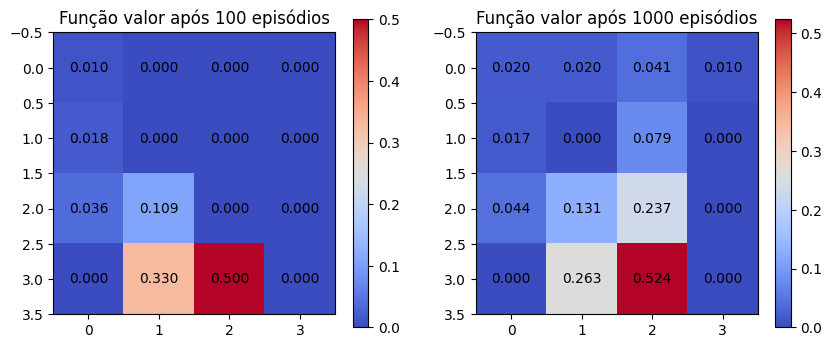

In [15]:
def plot_side_by_side(func_1, func_2, ep_1, ep_2):
    """
      Exibe a matrizes de confusões com as valores que indicam estados que têm
      a maior probabilidade de levar o agente ao objetivo

      Input:
        func_1 (ndarray): apresenta valores probabilisticos dentro de 100 episódios
        func_2 (ndarray): apresenta valores probabilisticos dentro de 1000 episódios
        ep_1 (int): Número de episódios em relação a func_1 para computar o label
        ep_2 (int): Número de episódios em relação a func_2 para computar o label
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    cax1 = axes[0].imshow(func_1, cmap='coolwarm')
    axes[0].set_title(f"Função valor após {ep_1} episódios")

    cax2 = axes[1].imshow(func_2, cmap='coolwarm')
    axes[1].set_title(f"Função valor após {ep_2} episódios")

    for i in range(func_1.shape[0]):
        for j in range(func_1.shape[1]):
            axes[0].text(j, i,
                         f"{func_1[i, j]:.3f}",
                         ha='center', va='center', color='black')
            axes[1].text(j, i,
                         f"{func_2[i, j]:.3f}",
                         ha='center', va='center', color='black')

    fig.colorbar(cax1, ax=axes[0])
    fig.colorbar(cax2, ax=axes[1])
    plt.show()


funcao_valor_100 = monte_carlo(env, 100, gamma)
funcao_valor_100_reshape = np.round(funcao_valor_100, 3).reshape(4, 4)

funcao_valor_1000 = monte_carlo(env, 1000, gamma)
funcao_valor_1000_reshape = np.round(funcao_valor_1000, 3).reshape(4, 4)

plot_side_by_side(funcao_valor_100_reshape, funcao_valor_1000_reshape, 100, 1000)

#### Visualização do cenário

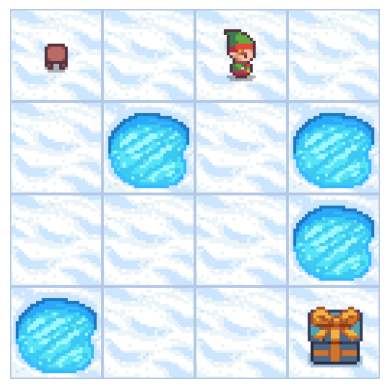

Estado: 2
Ação: 2
Recompensa: 0.0


KeyboardInterrupt: 

In [18]:
# Cria o ambiente com renderização de imagem habilitada
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=False)

def print_frames(frames, env):
    for i, frame in enumerate(frames):
        clear_output(wait=True)

        # Atualiza o ambiente com a ação do frame
        acao = frame['acao']
        estado, recompensa, terminated, truncated, _ = env.step(acao)
        done = terminated or truncated
        img = env.render()

        # Exibir a imagem
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print(f"Estado: {estado}")
        print(f"Ação: {acao}")
        print(f"Recompensa: {recompensa}")

        if done:
            env.reset()

        sleep(0.5)

    env.close()

# Coleta dos frames
frames = []
env.reset()
num_episodios = 100
for _ in range(num_episodios):
    acao = env.action_space.sample()
    estado, recompensa, terminated, truncated, _ = env.step(acao)
    frames.append({'estado': estado, 'acao': acao, 'recompensa': recompensa})
    if terminated or truncated:
        env.reset()

# Executa a visualização dos frames
print_frames(frames, env)